

#### **O que é Aprendizado Supervisionado?**
O aprendizado supervisionado é um tipo de aprendizado de máquina onde o modelo aprende a partir de dados rotulados. Isso significa que para cada entrada (input) no conjunto de dados, temos uma saída correspondente (label). O objetivo é ensinar o modelo a prever a saída correta para novas entradas baseando-se no que foi aprendido.

Exemplo:  
Imagine que você tem um conjunto de dados sobre casas, com informações como tamanho (em m²), número de quartos e preço de venda. O objetivo do aprendizado supervisionado é criar um modelo que possa prever o preço de uma casa, dado seu tamanho e número de quartos.  

#### **O que é Regressão Linear?**
A regressão linear é uma técnica de aprendizado supervisionado usada para prever valores contínuos. O modelo tenta encontrar a melhor linha reta que se ajusta aos dados, minimizando a distância entre a linha e os pontos reais.

**Fórmula Matemática da Regressão Linear**:  


$ y = w \cdot x + b $

- \( y \): valor previsto (variável dependente)  
- \( x \): entrada (variável independente)  
- \( w \): coeficiente angular (peso do atributo)  
- \( b \): intercepto (constante)  

#### **Objetivo da Prática**  
Nesta atividade, você aprenderá:  
1. Como implementar um modelo de regressão linear.  
2. Como medir a precisão do modelo.  
3. Como identificar quais atributos mais influenciam a saída usando métodos estatísticos.
4. Validação Cruzada.



### Importação das Bibliotecas Necessárias

In [14]:
# Importação das bibliotecas principais
import numpy as np  # Biblioteca para manipulação de arrays numéricos
import pandas as pd  # Biblioteca para manipulação de dados em tabelas (dataframes)
import matplotlib.pyplot as plt  # Biblioteca para criar gráficos
import seaborn as sns  # Biblioteca para gráficos mais elegantes e informativos

# Importação de bibliotecas para aprendizado de máquina
from sklearn.model_selection import train_test_split, cross_val_score  # Dividir o dataset e realizar validação cruzada
from sklearn.linear_model import LinearRegression, Lasso  # Modelos de regressão linear e Lasso
from sklearn.metrics import mean_squared_error, r2_score  # Métricas para avaliação do modelo
from sklearn.preprocessing import StandardScaler

# Configuração inicial para visualização dos gráficos
sns.set(style="whitegrid")  # Define um estilo de grade para os gráficos
plt.rcParams['figure.figsize'] = (10, 6)  # Define o tamanho padrão dos gráficos

### Dataset: Boston Housing  

O conjunto de dados "Boston Housing" foi originalmente coletado pelo U.S. Census Service. Ele contém informações detalhadas sobre diferentes bairros de Boston, nos Estados Unidos. O objetivo mais comum ao usar este dataset é prever o preço médio das casas em função de variáveis que descrevem as condições socioeconômicas e características do bairro.

#### **Atributos do Dataset**  
O dataset possui 13 atributos explicativos e 1 variável alvo:  
- **CRIM**: Taxa de criminalidade per capita.  
- **ZN**: Proporção de terrenos residenciais zoneados para lotes maiores que 25.000 pés².  
- **INDUS**: Proporção de áreas comerciais não comerciais na cidade.  
- **CHAS**: 1 se o bairro faz limite com o rio Charles, 0 caso contrário.  
- **NOX**: Concentração de óxidos de nitrogênio (ppm).  
- **RM**: Número médio de cômodos por habitação (excelente para visualização da regressão).  
- **AGE**: Proporção de unidades ocupadas construídas antes de 1940.  
- **DIS**: Distância ponderada até 5 centros de emprego em Boston.  
- **RAD**: Índice de acessibilidade às rodovias principais.  
- **TAX**: Taxa de imposto sobre propriedade por \$10.000.  
- **PTRATIO**: Proporção aluno-professor por bairro.  
- **B**: Proporção de negros por bairro (\(1000(Bk - 0.63)^2\)).  
- **LSTAT**: Porcentagem de status social baixo na população.  
- **MEDV**: Preço médio das casas no bairro (\$1000). *(Variável Alvo)*  

#### **Objetivo na Prática**  
Usaremos este dataset para prever o preço médio das casas (**MEDV**).  


In [15]:
# Importar o dataset Boston Housing da biblioteca sklearn
from sklearn.datasets import fetch_openml

# Carregar o dataset e convertê-lo para um DataFrame
boston = fetch_openml(name="boston", version=1, as_frame=True)
boston_df = boston.data
boston_df['MEDV'] = boston.target  # Adicionar a variável alvo

# Visualizar as 5 primeiras linhas do DataFrame
print("Visualizando as primeiras linhas do dataset:")
boston_df.head()


Visualizando as primeiras linhas do dataset:


/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Dataset Sintético: Tempo de Estudo vs Nota

Neste dataset sintético, vamos simular a relação entre o **tempo de estudo** (em horas) e a **nota final** em uma prova. O objetivo é criar um modelo de regressão linear para prever a nota de um aluno com base no tempo que ele dedicou ao estudo.

#### **Características do Dataset**  
- **Tempo de Estudo** (em horas): Número de horas que o aluno estudou para a prova.  
- **Nota** (de 0 a 100): A nota final do aluno na prova.  



#### **Objetivo na Prática**  
- Os alunos utilizarão este dataset para:  
  1. Visualizar a relação linear entre o tempo de estudo e a nota.  
  2. Aplicar um modelo de regressão linear para prever a nota com base no tempo de estudo.




In [16]:
# Gerar dados sintéticos para Tempo de Estudo vs Nota
np.random.seed(42)  # Para resultados reproduzíveis
tempo_estudo = np.random.rand(100) * 10  # Tempo de estudo em horas
nota = (10*tempo_estudo + np.random.randint(0, 20, size=100))  # Nota com ruído
nota = np.clip(nota, 0, 100)  # Limitar a nota entre 0 e 100
# Criar DataFrame
data_sintetico_estudo = pd.DataFrame({
    'Tempo_Estudo_horas': tempo_estudo,
    'Nota': nota
})

# Visualizar as primeiras 10 linhas do DataFrame
print("Visualizando as primeiras 10 linhas do dataset sintético (Tempo de Estudo vs Nota):")
data_sintetico_estudo.head(10)


Visualizando as primeiras 10 linhas do dataset sintético (Tempo de Estudo vs Nota):


,Tempo_Estudo_horas,Nota
0,3.745401,43.454012
1,9.507143,100.000000
2,7.319939,92.199394
3,5.986585,62.865848
4,1.560186,19.601864
5,1.559945,21.599452
6,0.580836,17.808361
7,8.661761,100.000000
8,6.011150,70.111501
9,7.080726,73.807258


### Aplicação da Regressão Linear no Dataset Sintético

### O que o código faz:
1. **Modelagem:** O modelo de regressão linear é criado e treinado com o dataset sintético.
2. **Previsões:** O modelo faz previsões para todos os pontos no dataset, com base no tempo de estudo.
3. **Exibição:** São mostradas as **10 primeiras predições** feitas pelo modelo.
4. **Plotagem:** O gráfico exibe os dados reais (como pontos) e a reta de regressão ajustada ao modelo (como uma linha vermelha).



In [51]:
w, b = 0, 0 

# Separar as variáveis independentes (atributos) e dependentes (target)
X = data_sintetico_estudo[['Tempo_Estudo_horas']]  # A variável independente é o tempo de estudo
y = data_sintetico_estudo['Nota']  # A variável dependente é a nota

# Instanciar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo com os dados
modelo.fit(X, y)

LinearRegression()

In [ ]:
erro = nota_real - nota_predita (30 - 25) = 5

minimizar o erro quedrático médio: np.mean(erro ** 2)


In [56]:
## Me indique um tempo de estudo que irei prever a nota

tempo_de_estudo = np.array([3.745401]).reshape(1,1)

nota_prevista = modelo.predict(tempo_de_estudo)
print(f'A nota prevista é de : {nota_prevista[0]:.2f}')

A nota prevista é de : 46.57


/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
w,b = modelo.coef_, modelo.intercept_

w,b = 2,3

In [55]:
y_pred = w * tempo_de_estudo + b
y_pred

array([[19]])

In [34]:
modelo.coef_, modelo.intercept_

(array([9.50261116]), 10.977959592007231)

Primeiras 10 predições feitas pelo modelo:
[ 46.56905073 101.32064339  80.53649761  67.86614753  25.80380433
  25.80151229  16.49741941  93.2873107   68.09958179  78.2633434 ]


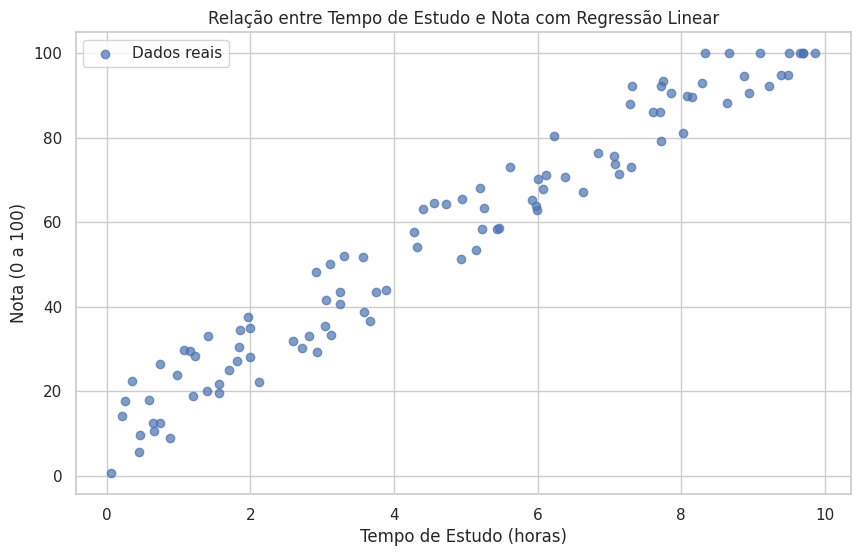

In [58]:
# Separar as variáveis independentes (atributos) e dependentes (target)
X = data_sintetico_estudo[['Tempo_Estudo_horas']]  # A variável independente é o tempo de estudo
y = data_sintetico_estudo['Nota']  # A variável dependente é a nota

# Instanciar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo com os dados
modelo.fit(X, y)

#Quais são os melhores parâmetros que minimizam a função custo (MSE)
    #vetor w e b

# Fazer previsões
predicoes = modelo.predict(X)

# Exibir as 10 primeiras predições
print("Primeiras 10 predições feitas pelo modelo:")
print(predicoes[:10])

# Plotar os dados e a reta de regressão
plt.scatter(X, y, alpha=0.7, label='Dados reais')  # Plotando os pontos reais
# plt.plot(X, predicoes, color='red', label='Reta de Regressão', linewidth=2)  # Plotando a reta de regressão
plt.title("Relação entre Tempo de Estudo e Nota com Regressão Linear")
plt.xlabel("Tempo de Estudo (horas)")
plt.ylabel("Nota (0 a 100)")
plt.legend()
plt.show()


In [91]:
novos_tempos_estudo = np.linspace(0,15,1000).reshape(-1,1)

notas_novos_tempos_estudo = modelo.predict(novos_tempos_estudo)

/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


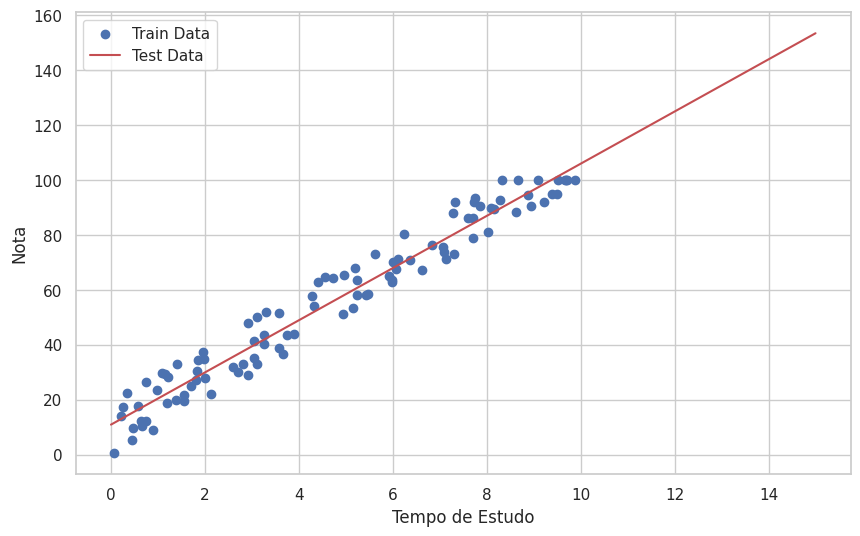

In [92]:
plt.scatter(data_sintetico_estudo['Tempo_Estudo_horas'], data_sintetico_estudo['Nota'], label='Train Data')
plt.plot(novos_tempos_estudo, notas_novos_tempos_estudo, c='r', label='Test Data')
plt.xlabel('Tempo de Estudo')
plt.ylabel('Nota')
plt.legend()


Para medir o acerto da regressão linear usando o dataset sintético, vamos calcular duas métricas comuns:

1. **Coeficiente de Determinação (\(R^2\))**: Essa métrica indica a proporção da variação total da variável dependente (nota) que é explicada pela regressão.
2. **Raiz Erro Quadrático Médio (RMSE)**: Essa métrica quantifica o erro médio entre as predições e os valores reais.

### Explicação das Métricas:
1. **$(R^2$)**: O valor varia entre 0 e 1. Quanto mais próximo de 1, melhor o modelo, já que ele consegue explicar a maior parte da variação nos dados.
2. **RMSE**: O RMSE é uma medida da magnitude do erro. Valores menores indicam que as previsões estão mais próximas dos valores reais. Ele está na mesma unidade das variáveis (neste caso, a nota).

### Exemplo de Saída:
- **$(R^2$)**: Por exemplo, um valor de 0.85 significa que 85% da variação na nota pode ser explicada pelo tempo de estudo.
- **RMSE**: Um valor de, por exemplo, 4.21 indicaria que, em média, o modelo comete um erro de 4.21 pontos na previsão da nota.

Com isso, os alunos podem avaliar a precisão do modelo. Podemos seguir com o próximo passo ou gostaria de fazer algum ajuste?

In [93]:
# Calcular o R² (Coeficiente de Determinação)
r2 = modelo.score(X, y)
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

# Calcular o RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y, predicoes))
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")


Coeficiente de Determinação (R²): 0.9555
Raiz do Erro Quadrático Médio (RMSE): 6.0701




### **Cálculo do Coeficiente de Determinação $R^2$**

A fórmula do $R^2$ é dada por:

$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$

Onde:
- $(y_i)$ são os valores reais (notas reais).
- $(\hat{y}_i)$ são os valores previstos.
- $(\bar{y})$ é a média dos valores reais.

### **Erro Quadrático Médio (RMSE)**

A fórmula do RMSE é:

$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$

Onde:
- $(y_i)$ são os valores reais.
- $(\hat{y}_i)$ são os valores previstos.
- $(n)$ é o número total de amostras.

Agora, vamos calcular essas métricas manualmente com base no dataset sintético.



In [94]:
# Cálculo manual de R²

# Calcular a média dos valores reais (y)
y_media = np.mean(y)

# Calcular o somatório dos quadrados dos resíduos (SQR)
soma_quadrados_residuos = np.sum((y - predicoes) ** 2)

# Calcular o somatório dos quadrados totais (SQT)
soma_quadrados_totais = np.sum((y - y_media) ** 2)

# Calcular o R² manualmente
r2_manual = 1 - (soma_quadrados_residuos / soma_quadrados_totais)
print(f"Coeficiente de Determinação (R²) - Cálculo Manual: {r2_manual:.4f}")


# Cálculo manual de RMSE
# Calcular o erro quadrático médio (RMSE)
erro_quadratico_medio = np.sqrt(np.mean((y - predicoes) ** 2))
print(f"Erro Quadrático Médio (RMSE) - Cálculo Manual: {erro_quadratico_medio:.4f}")


Coeficiente de Determinação (R²) - Cálculo Manual: 0.9555
Erro Quadrático Médio (RMSE) - Cálculo Manual: 6.0701


### Aplicando regressão Linear em todas as features do dataset Boston Housing

vamos aplicar a regressão linear no famoso dataset Boston Housing, utilizando todas as features do dataset. O objetivo aqui é prever o preço das casas (variável dependente) com base nas diversas características das casas (variáveis independentes).

Passos:

1. Aplicar o modelo de regressão linear utilizando todas as features.
2. Mostrar as predições feitas pelo modelo.
3. Avaliar o modelo



In [ ]:
# Usando o dataset Boston Housing já carregado no Colab
X_boston = boston_df.drop('MEDV', axis=1).values  # Converte para NumPy array
y_boston = boston_df['MEDV'].values  # Converte para NumPy array

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
modelo_boston = LinearRegression()

# Treinar o modelo com o conjunto de treino
modelo_boston.fit(X_train, y_train)

# Fazer as predições com o conjunto de teste
predicoes_boston = modelo_boston.predict(X_test)

# Calcular o R² (Coeficiente de Determinação)
r2 = modelo_boston.score(X_test, y_test)
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

# Calcular o RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error( y_test, predicoes_boston))
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")

# Exibir as primeiras 10 predições no conjunto de teste
print("Primeiras 10 predições feitas pelo modelo no conjunto de teste:")
print(predicoes_boston[:5])
print("Valores reais do conjunto de teste:")
print(y_test[:5])

Coeficiente de Determinação (R²): 0.6688
Raiz do Erro Quadrático Médio (RMSE): 4.9286
Primeiras 10 predições feitas pelo modelo no conjunto de teste:
[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]
Valores reais do conjunto de teste:
[23.6 32.4 13.6 22.8 16.1]


### Definindo os Atributos mais Relevantes

O **coeficiente de Lasso** (Least Absolute Shrinkage and Selection Operator) é uma técnica de regularização utilizada em modelos de regressão, como a **regressão linear**, para melhorar a generalização e reduzir o overfitting. O Lasso adiciona um termo de penalização à função de custo, que é baseado na soma dos valores absolutos dos coeficientes da regressão. Essa penalização força alguns dos coeficientes a se aproximarem de zero, o que pode resultar em um modelo mais simples e com menos variáveis significativas.

### A fórmula da função de custo com Lasso:

A função de custo com regularização Lasso é dada por:

$
\text{Custo} = \text{MSE} + \lambda \sum_{j=1}^{p} |\beta_j|
$

Onde:
- **MSE** é o erro quadrático médio, que mede a diferença entre as predições do modelo e os valores reais.
- **$\beta_j$** são os coeficientes das variáveis independentes.
- **$\lambda$** é o hiperparâmetro de regularização que controla a quantidade de penalização aplicada aos coeficientes.

### O que o Lasso faz:
- Quando **$\lambda$** = 0, o Lasso não penaliza os coeficientes, o que equivale a uma regressão linear simples.
- Quando **$\lambda$** aumenta, o Lasso força mais coeficientes a se aproximarem de zero. Isso leva a um modelo mais esparso (com menos variáveis) e pode ser útil para seleção de características (atributos).

### Vantagens do Lasso:
- **Seleção de Atributos:** O Lasso pode ser usado para selecionar automaticamente as variáveis mais relevantes, uma vez que ele tende a reduzir a magnitude dos coeficientes de variáveis irrelevantes a zero.
- **Evitar Overfitting:** Ele ajuda a evitar o overfitting, especialmente quando há muitas variáveis.

### Implementação do Lasso no dataset de Boston Housing:

Agora, vamos usar a técnica de Lasso para identificar os **atributos mais relevantes** do dataset **Boston Housing**. A ideia é treinar um modelo de Lasso e examinar os coeficientes gerados.



Coeficientes de Lasso para cada atributo:
CRIM: -0.1042
ZN: 0.0349
INDUS: -0.0168
CHAS: 0.9200
NOX: -0.0000
RM: 4.3117
AGE: -0.0151
DIS: -1.1515
RAD: 0.2392
TAX: -0.0130
PTRATIO: -0.7322
B: 0.0131
LSTAT: -0.5647


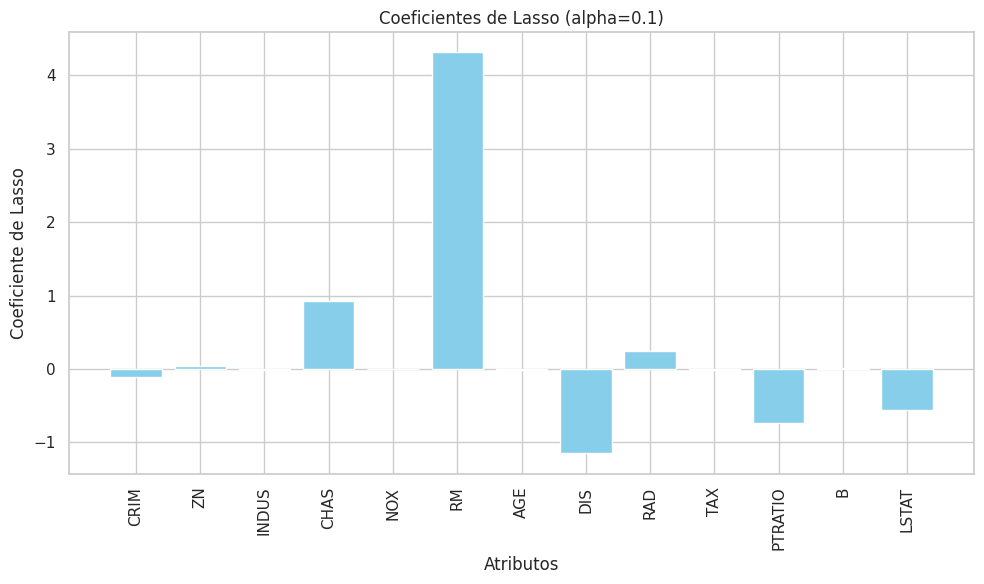

In [96]:
# Ajustar o Lasso com um valor de lambda (alpha) que controla a penalização
alpha = 0.1  # Pode ajustar esse valor para ver diferentes resultados
lasso = Lasso(alpha=alpha)

# Treinar o modelo Lasso com os dados de treino (não normalizados)
lasso.fit(X_train, y_train)
df = boston_df.drop(['MEDV'],axis=1)
# Exibir os coeficientes de Lasso
print("Coeficientes de Lasso para cada atributo:")
for atributo, coef in zip(df.columns, lasso.coef_):
    print(f"{atributo}: {coef:.4f}")

# Plotar os coeficientes para visualização
plt.figure(figsize=(10,6))
plt.bar(df.columns, lasso.coef_, color='skyblue')
plt.xlabel("Atributos")
plt.ylabel("Coeficiente de Lasso")
plt.title(f"Coeficientes de Lasso (alpha={alpha})")
plt.xticks(rotation=90)
plt.tight_layout()  # Ajusta o layout para que o texto no eixo x não se sobreponha
plt.show()



### Explicação do código:
1. **Importação do Lasso:** A função `Lasso` do scikit-learn é usada para treinar um modelo de regressão linear regularizado.
2. **Treinamento:** O modelo Lasso é treinado com os dados de treino. O parâmetro **alpha** é o valor de regularização (\(\lambda\)) que controla a penalização. Valores maiores de alpha resultam em coeficientes mais próximos de zero.
3. **Coeficientes:** Os coeficientes de Lasso são exibidos para cada atributo. A magnitude de cada coeficiente indica a importância relativa da variável. Coeficientes próximos de zero indicam variáveis menos relevantes.
4. **Visualização:** Um gráfico de barras é plotado para visualizar a importância relativa dos atributos. A altura da barra representa o valor absoluto do coeficiente, e as barras mais altas indicam os atributos mais relevantes.

### O que observar:
- **Coeficientes próximos de zero**: Indicam que o atributo tem pouca ou nenhuma importância para o modelo.
- **Coeficientes com valores grandes em magnitude**: São os atributos mais relevantes para o modelo de regressão Lasso.

### Considerações:
- **Seleção de atributos**: Ao ajustar o valor de **alpha**, você pode controlar a quantidade de regularização aplicada. Se aumentar muito o valor de alpha, alguns coeficientes podem se tornar exatamente zero, o que implica que essas variáveis não são relevantes para o modelo.

### Próximos passos:
- Você pode experimentar diferentes valores de **alpha** e observar como os coeficientes mudam, e assim avaliar a importância dos atributos em diferentes cenários.


### Aplicando a regressão linear somente no atributo mais relevante

Agora vamos focar na aplicação da **regressão linear** apenas no atributo **'RM'**, que representa o número médio de quartos por casa no dataset **Boston Housing**. Vamos aplicar a regressão linear, fazer as predições e avaliar o desempenho do modelo com as métricas $R^2$ e RMSE.

### Passos para a regressão linear no atributo 'RM':

1. **Selecionar o atributo 'RM'**: Vamos selecionar a coluna `'RM'` e usá-la como a variável preditora (X).
2. **Treinar o modelo**: Aplicar a regressão linear apenas com esse atributo.
3. **Fazer predições**: Utilizar o modelo treinado para fazer previsões no conjunto de teste.
4. **Avaliar o modelo**: Calcular as métricas de desempenho $R^2$ e RMSE.


In [97]:
# Selecionar o atributo 'RM' do dataset
X_rm = boston_df[['RM']].values  # Atributo 'RM' como variável preditora
y_boston = y_boston  # Preço das casas (variável dependente)


X_train_rm, X_test_rm, y_train, y_test = train_test_split(X_rm, y_boston, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
modelo_rm = LinearRegression()

# Treinar o modelo usando o atributo 'RM'
modelo_rm.fit(X_train_rm, y_train)

# Fazer predições no conjunto de teste
predicoes_rm = modelo_rm.predict(X_test_rm)

# Exibir as primeiras 10 predições feitas pelo modelo
print("Primeiras 5 predições feitas pelo modelo de regressão linear no atributo 'RM':")
print(predicoes_rm[:5])

# Calcular R²
r2_rm = r2_score(y_test, predicoes_rm)

# Calcular RMSE
rmse_rm = np.sqrt(mean_squared_error(y_test, predicoes_rm))

# Exibir as métricas de avaliação
print(f"Coeficiente de Determinação (R²) para o modelo com o atributo 'RM': {r2_rm:.4f}")
print(f"Erro Quadrático Médio (RMSE) para o modelo com o atributo 'RM': {rmse_rm:.4f}")

Primeiras 5 predições feitas pelo modelo de regressão linear no atributo 'RM':
[23.73238293 26.92950201 19.68456842 20.45112913 22.61993506]
Coeficiente de Determinação (R²) para o modelo com o atributo 'RM': 0.3708
Erro Quadrático Médio (RMSE) para o modelo com o atributo 'RM': 6.7930


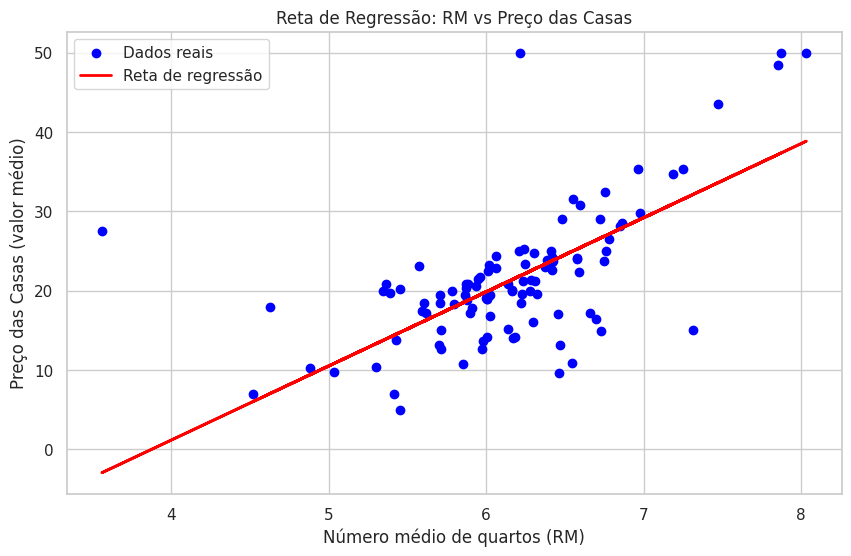

In [98]:

# Plotar os dados reais (RM vs Preço das casas)
plt.scatter(X_test_rm, y_test, color='blue', label='Dados reais')

# Plotar a reta de regressão (previsões feitas pelo modelo)
plt.plot(X_test_rm, predicoes_rm, color='red', linewidth=2, label='Reta de regressão')

# Adicionar título e rótulos aos eixos
plt.title('Reta de Regressão: RM vs Preço das Casas')
plt.xlabel('Número médio de quartos (RM)')
plt.ylabel('Preço das Casas (valor médio)')

# Exibir a legenda
plt.legend()

# Exibir o gráfico
plt.show()


### Usando Matriz de correlação para encontrar os atributos mais reelevantes


A **matriz de correlação** é uma ferramenta estatística que mede a relação entre diferentes variáveis em um conjunto de dados. Ela é especialmente útil para entender como as variáveis estão relacionadas entre si, o que pode ajudar a identificar quais variáveis são mais importantes para modelos preditivos, como a **regressão linear**.

#### Definindo Correlação:

A correlação entre duas variáveis pode ser representada por um valor numérico chamado **coeficiente de correlação**, que varia entre -1 e 1:

- **+1**: Correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta de forma proporcional).
- **-1**: Correlação negativa perfeita (quando uma variável aumenta, a outra diminui de forma proporcional).
- **0**: Nenhuma correlação linear (não há relação linear entre as variáveis).

O coeficiente de correlação mais comum é o **coeficiente de correlação de Pearson**, que mede a força da relação linear entre duas variáveis.

#### Matriz de Correlação:

A **matriz de correlação** é uma tabela onde cada célula mostra o valor de correlação entre duas variáveis. No caso do nosso dataset de **Boston Housing**, a matriz de correlação ajuda a entender como as variáveis, como o número de quartos (RM), a taxa de criminalidade (CRIM), a idade das casas (AGE), entre outras, se relacionam entre si.

Uma **alta correlação positiva** (perto de +1) ou **alta correlação negativa** (perto de -1) indica que as variáveis estão fortemente relacionadas, enquanto uma **correlação próxima de 0** sugere que não há uma relação linear significativa.

### Como Usar a Matriz de Correlação:

1. **Identificação de Atributos Relevantes**: Podemos identificar quais atributos estão fortemente correlacionados com a variável dependente (no caso, o preço das casas). Se houver atributos altamente correlacionados, eles podem ser usados para melhorar o modelo.
2. **Redução de Multicolinearidade**: Quando várias variáveis estão fortemente correlacionadas entre si, isso pode causar problemas em modelos de regressão (multicolinearidade). A matriz de correlação ajuda a identificar e resolver esse problema.

### Visualizando a Matriz de Correlação:

Agora, vamos calcular e plotar a **matriz de correlação** para o dataset **Boston Housing**. Vamos ver como as variáveis se relacionam entre si e quais são as mais relevantes para o modelo de regressão.


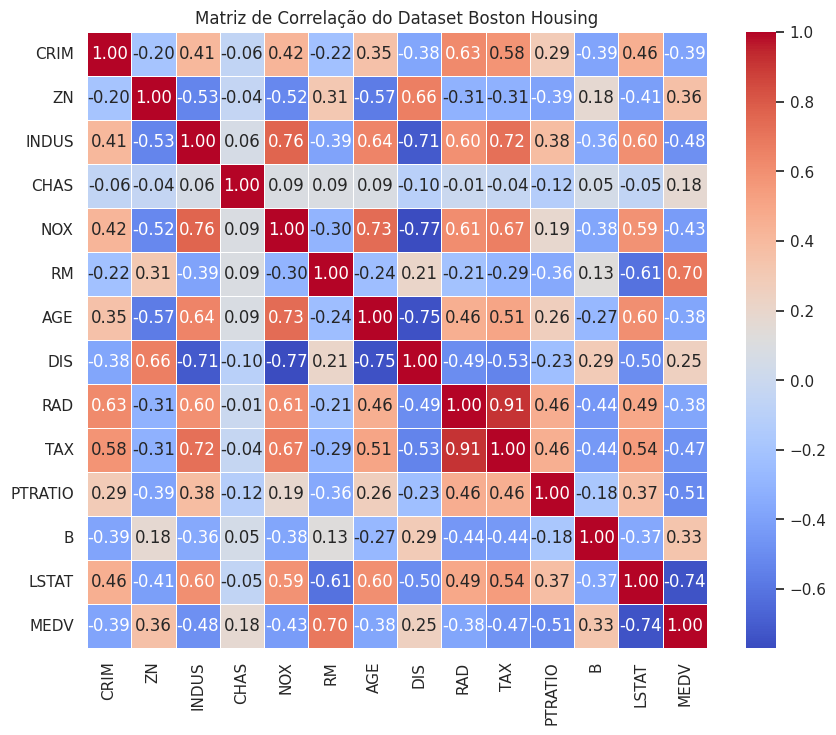

In [24]:
# Calcular a matriz de correlação
correlacao = boston_df.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação do Dataset Boston Housing")
plt.show()


### Aplicando a regressão linear nos atributos de maior correlação negativa.

In [100]:
# Selecionar as 4 variáveis com maior correlação negativa com o preço das casas (target)
# Excluir a correlação do próprio preço das casas com ele mesmo
correlacao_com_target = correlacao['MEDV'].drop('MEDV')

# Selecionar os 4 atributos mais correlacionados com o preço
atributos_mais_correlacionados = correlacao_com_target.sort_values(ascending=True).head(10)
print("4 Atributos com maior correlação negativa com o preço:")
print(atributos_mais_correlacionados)

# Selecionar os dados do conjunto X com os 4 atributos mais correlacionados
X_selecionado = boston_df[atributos_mais_correlacionados.index].values
X_train, X_test, y_train, y_test = train_test_split(X_selecionado, y_boston, test_size=0.2, random_state=42)

modelo = LinearRegression()

# Treinar o modelo com os 4 atributos selecionados
modelo.fit(X_train, y_train)

# Fazer predições no conjunto de teste
predicoes = modelo.predict(X_test)

# Calcular as métricas de desempenho
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, predicoes)
rmse = np.sqrt(mean_squared_error(y_test, predicoes))

# Exibir as métricas de desempenho
print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print(f"Erro Quadrático Médio (RMSE): {rmse:.4f}")


4 Atributos com maior correlação negativa com o preço:
LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
Name: MEDV, dtype: float64
Coeficiente de Determinação (R²): 0.6756
Erro Quadrático Médio (RMSE): 4.8774


### Aplicando regressão linear Normalizando o Dataset Boston Housing

In [107]:
# 1. Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))

# 2. Regressão Linear com Validação Cruzada
modelo = LinearRegression()

# Treinar o modelo com os dados escalonados e calcular R² final
modelo.fit(X_train_scaled, y_train_scaled)
r2_final = modelo.score(X_test_scaled, y_test_scaled)
print(f"R² final no conjunto completo de dados: {r2_final:.4f}")


R² final no conjunto completo de dados: 0.6756




### **Validação Cruzada**



A **validação cruzada (cross-validation)** é uma técnica usada para avaliar a performance de um modelo de aprendizado de máquina de maneira mais robusta, ajudando a evitar problemas como **overfitting** ou **underfitting**. A ideia central é dividir o dataset em múltiplos subconjuntos e realizar múltiplos treinos e testes para garantir que o modelo tenha um desempenho consistente em diferentes partes dos dados.

#### **Passos da Validação Cruzada**:
1. **Dividir o dataset**: O conjunto de dados é dividido em "k" subconjuntos (ou "folds"). Por exemplo, se estivermos usando 5-fold cross-validation, o conjunto será dividido em 5 partes.
2. **Treinar o modelo**: O modelo é treinado em \(k-1\) subconjuntos (dados de treino) e testado no subconjunto restante (dados de teste). Este processo é repetido para cada uma das \(k\) partes.
3. **Média das métricas**: O desempenho do modelo é avaliado pela média das métricas (como \( R^2 \), RMSE) obtidas em cada rodada de validação. Essa média fornece uma estimativa mais confiável da capacidade de generalização do modelo.

#### **Vantagens da Validação Cruzada**:
- **Evita overfitting**: Ao treinar e testar o modelo em diferentes partes do conjunto de dados, é mais difícil que o modelo memorize dados específicos.
- **Avaliação mais robusta**: Ao usar várias divisões dos dados, obtemos uma avaliação mais precisa do desempenho do modelo.

#### **Como Usaremos a Validação Cruzada no Dataset Boston Housing?**
Vamos aplicar a **validação cruzada** utilizando o modelo de **regressão linear** no dataset **Boston Housing**. A métrica que vamos focar para avaliação será o **coeficiente de determinação $ R^2$**, que mede o quanto do comportamento dos dados é explicado pelo modelo.
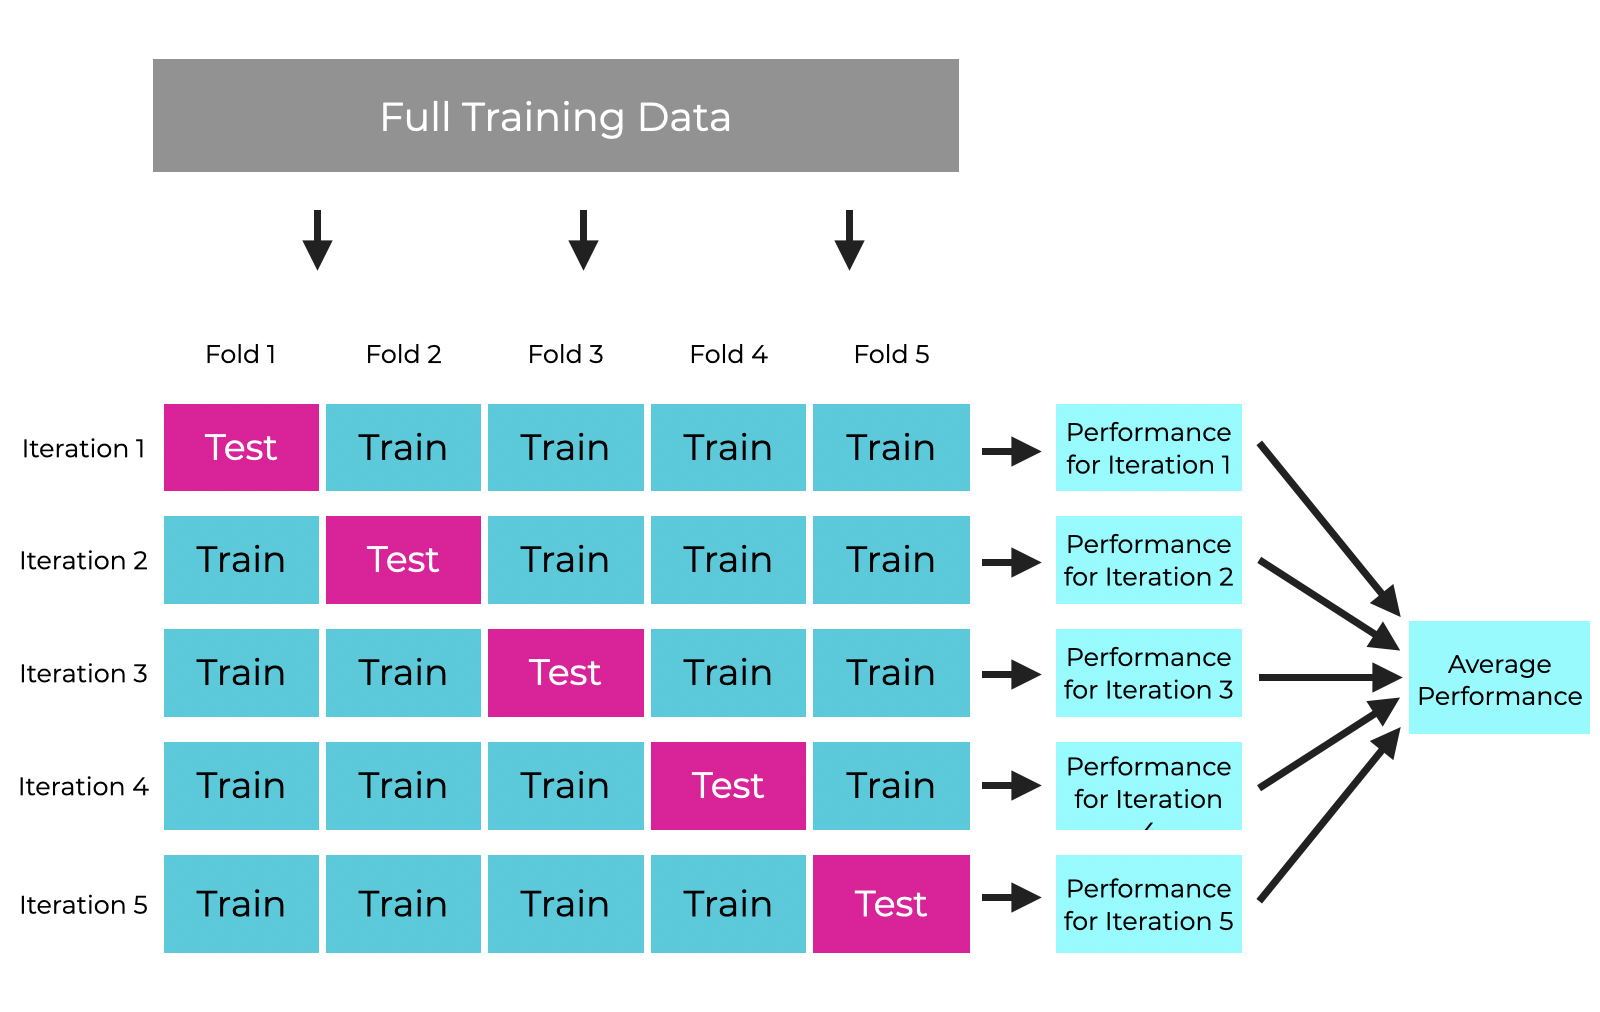



In [27]:

scaler = StandardScaler()
X_boston_scaled = scaler.fit_transform(X_boston)

# 3. Criar o modelo de regressão linear
modelo = LinearRegression()

# 4. Aplicar a validação cruzada com 5 folds
cv_scores = cross_val_score(modelo, X_boston_scaled, y_boston, cv=5, scoring='r2')

# 5. Exibir os resultados
print(f"R² para cada fold: {cv_scores}")
print(f"R² médio (desempenho do modelo): {cv_scores.mean():.4f}")
print(f"Desvio padrão dos R²: {cv_scores.std():.4f}")


R² para cada fold: [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
R² médio (desempenho do modelo): 0.3533
Desvio padrão dos R²: 0.3766
